In this notebook, I created a network of thesis advisors/readers based on the committees in which people appeared together. I might not end up using this in my research but I created clusters (communities) based on this network.

In [1]:
!pip install --user networkx

In [2]:
#networkx for creating and analyzing network, pandas for data stuff + read/write csv files, counter for counting connections btw/ profs
import networkx
import pandas as pd
from collections import Counter

I don't plan to represent committee chairs differently from members because the data is not that consistent. 
* Sometimes, the "committee members" is null.
* Sometimes there are multiple committee chairs.
* Sometimes "committee chair" is null.

In [3]:
#I concatonate the names of committee chairs (sometimes multiple) with names of committee members
#Each time they advise/read the same thesis, it will count as a collection

thesis_df = pd.read_csv('theses.csv')
advisor_list = thesis_df['committee_chair'].tolist()
committee_list = thesis_df['committee_members'].tolist()

for idx, advisor in enumerate(advisor_list):
    if type(advisor) == str:
        advisor_list[idx]=advisor.split(';')
        
for idx, member in enumerate(committee_list):
    if type(member) == str:
        committee_list[idx]=member.split(';')
        
for idx, advisor in enumerate(advisor_list):
    if type(advisor) == float and type(committee_list[idx]) == float:
        advisor_list[idx] = []
    elif type(advisor) == float:
        advisor_list[idx] = committee_list[idx]
    elif type(committee_list[idx]) == float: continue
    else: advisor_list[idx] = advisor + committee_list[idx]
    

advisor_list[:500]

[['Boadie Dunlop', "Kate O'Toole", 'Micheal Crutcher'],
 ['Scott Fridkin', 'Sarah Satola'],
 ['Joshy Jacob',
  'Roger B. Deal',
  'Jeremy M. Boss',
  'William G. Kelly',
  'Ignacio Sanz'],
 ['Jennifer Ayres', 'Teresa Fry Brown'],
 ['Vijaya Kancherla', 'Paul Romitti'],
 ['Rabindra Tirouvanziam',
  'Periasamy Selvaraj',
  'Lou Ann Brown',
  'Daniel Kalman',
  'Jacob Kohlmeier'],
 ['Saad Omer'],
 ['Roger Rochat'],
 ['Albert Padwa', 'Simon Blakey', 'Frank McDonald'],
 ['Veronika Fedirko',
  'Roberd M. Bostick',
  'Marjorie L. McCullough',
  'W. Dana Flanders'],
 ['Sophia Hussen', 'Whitney Rice'],
 ['Ellen Ott Marshall', 'Elizabeth Corrie'],
 ['Carla Berg', 'Eric Nehl'],
 ['Lauren McCullough'],
 ['Edmund Waller',
  'Brian Evavold',
  'Periasamy Selvaraj',
  'Lawrence Boise',
  'Jacques Galipeau'],
 ['Cassandra Quave', 'Sarah Chisolm', 'Meleah Hickman'],
 ['Matthew C. Freeman'],
 ['Alvaro Alonso', 'Maan Jokhadar'],
 ['Yan V. Sun'],
 ['Amy Webb Girard'],
 ['Amita Manatunga', 'Andi Shane', 'Ig

In [4]:
#random
print(advisor_list[1734])
print(thesis_df['committee_chair'][1734])
print(thesis_df['committee_members'][1734])

['Stephan Hamann', 'Scott O Lilienfeld', 'Lawrence Barsalou']
Stephan Hamann
Scott O Lilienfeld;Lawrence Barsalou


In [5]:
#I use a counter to increment and count the number of connections
connections = Counter()
profs = set()
for committee in advisor_list:
    size = len(committee)
    for i in range(0, size):
        for j in range(i+1, size):
            member_1 = committee[i]
            member_2 = committee[j]
            if member_1 < member_2: #I do this because connection (A,B) and connection (B,A) are the same thing so all should be (A,B)
                tmp = member_1
                member_1 = member_2
                member_2 = tmp
            connection = (member_1,member_2)
            if connection not in connections: connections[connection] = 0
            connections[connection] += 1
            profs.add(member_1)
            profs.add(member_2)

for connection in connections: 
    print (str(connection) +": "+ str(connections[connection]))

("Kate O'Toole", 'Boadie Dunlop'): 1
('Micheal Crutcher', 'Boadie Dunlop'): 1
('Micheal Crutcher', "Kate O'Toole"): 1
('Scott Fridkin', 'Sarah Satola'): 1
('Roger B. Deal', 'Joshy Jacob'): 1
('Joshy Jacob', 'Jeremy M. Boss'): 2
('William G. Kelly', 'Joshy Jacob'): 1
('Joshy Jacob', 'Ignacio Sanz'): 2
('Roger B. Deal', 'Jeremy M. Boss'): 2
('William G. Kelly', 'Roger B. Deal'): 2
('Roger B. Deal', 'Ignacio Sanz'): 2
('William G. Kelly', 'Jeremy M. Boss'): 1
('Jeremy M. Boss', 'Ignacio Sanz'): 2
('William G. Kelly', 'Ignacio Sanz'): 1
('Teresa Fry Brown', 'Jennifer Ayres'): 1
('Vijaya Kancherla', 'Paul Romitti'): 2
('Rabindra Tirouvanziam', 'Periasamy Selvaraj'): 3
('Rabindra Tirouvanziam', 'Lou Ann Brown'): 1
('Rabindra Tirouvanziam', 'Daniel Kalman'): 1
('Rabindra Tirouvanziam', 'Jacob Kohlmeier'): 3
('Periasamy Selvaraj', 'Lou Ann Brown'): 1
('Periasamy Selvaraj', 'Daniel Kalman'): 2
('Periasamy Selvaraj', 'Jacob Kohlmeier'): 2
('Lou Ann Brown', 'Daniel Kalman'): 1
('Lou Ann Brown', '

('Yijuan Hu', 'Karen N Conneely'): 2
('Yijuan Hu', 'Hao Wu'): 1
('Pat Whitten', 'Craig Hadley'): 1
('Pat Whitten', 'Mark Wilson'): 1
('Peter J Brown', 'Pat Whitten'): 1
('Mark Wilson', 'Craig Hadley'): 1
('Peter J Brown', 'Mark Wilson'): 1
('Qiang Zhang', 'Jessica A. Alvarez'): 1
('Thomas R. Ziegler', 'Qiang Zhang'): 1
('Thomas R. Ziegler', 'Jessica A. Alvarez'): 3
('Christine Yoder', 'Brent Strawn'): 1
('Christine Yoder', 'Carol A Newsom'): 1
('Joel LeMon', 'Christine Yoder'): 1
('Timothy Jackson', 'David Pacini'): 2
('Robert A Bednarczyk', 'Dabney Evans'): 4
('Susan Temporado Cookson', 'Roger Rochat'): 3
('Tayari Jones', 'Michelle Maria Wright'): 1
('Tayari Jones', 'Nathan Suhr-Sytsma'): 1
('Nathan Suhr-Sytsma', 'Michelle Maria Wright'): 1
('Matthew J Strickland', 'Jonathan Scott Yoder'): 1
('Paige Tolbert', 'Matthew J Strickland'): 9
('Paige Tolbert', 'Jonathan Scott Yoder'): 1
('Michael Heaven', 'James Kindt'): 20
('Susanna Widicus Weaver', 'Michael Heaven'): 16
('Susanna Widicus W

('Gary Bassell', 'Anita Corbett'): 15
('Morten Raastad', 'Keith Easterling'): 1
('Patrick Cafferty', 'Morten Raastad'): 1
('Patrick Cafferty', 'Keith Easterling'): 1
('Jacob L Wright', 'David L Petersen'): 3
('Jacob L Wright', 'Brent Strawn'): 4
('Giacomo Negro', 'Anand Swaminathan'): 3
('L G Thomas', 'Anand Swaminathan'): 1
('L G Thomas', 'Giacomo Negro'): 1
('Rachel Hall-Clifford', 'Christine L. Moe'): 1
('Rachel Hall-Clifford', 'Michelle Lampl'): 1
('Michelle Lampl', 'Christine L. Moe'): 1
('Michael Goodman', 'Alawode Oladele'): 1
('Ying Guo', 'Amita Manatunga'): 4
('Ying Guo', 'Tanja Jovanovic'): 1
('Ying Guo', 'Limin Peng'): 3
('Tanja Jovanovic', 'Amita Manatunga'): 1
('Limin Peng', 'Amita Manatunga'): 9
('Tanja Jovanovic', 'Limin Peng'): 1
('Eri Saikawa', 'Carolyn Keogh'): 2
('Eri Saikawa', 'Debjani Sihi'): 2
('Eri Saikawa', 'Eri Saikawa'): 1
('Debjani Sihi', 'Carolyn Keogh'): 1
('Paige Tolbert', 'Eri Saikawa'): 3
('Lou Ann Brown', 'John R Boring'): 1
('Lou Ann Brown', 'John E Mc

('Nicole Gerardo', 'Anthony Martin'): 1
('Anthony Martin', 'Anne Hall'): 1
('Nicole Gerardo', 'Anne Hall'): 1
('John E McGowan Jr.', 'Gerald H. Mazurek'): 1
('Karen Levy', 'Jonathan Yoder'): 1
('Zoe Marie Sakas', 'Matthew Freeman'): 1
('Ronda Cochran', 'Brent Johnson'): 1
('Thibadeau Judy', 'A Cecile Janssens'): 1
('Katherine Ong', 'A Cecile Janssens'): 1
('Thibadeau Judy', 'Katherine Ong'): 1
('Monique Hennink', 'Lynn M Sibley'): 1
('Roger Rochat', 'Lynn M Sibley'): 1
('Lynn M Sibley', 'Kenneth Hepburn'): 4
('Monique Hennink', 'Kenneth Hepburn'): 1
('Roger Rochat', 'Kenneth Hepburn'): 1
('Kristy Murray', 'Juan Leon'): 1
('S. Patrick Kachur', 'John E McGowan Jr.'): 1
('S. Patrick Kachur', 'Henry Michael Blumberg'): 1
('S. Patrick Kachur', 'John R Boring'): 1
('Robert Dreibelbis', 'Deborah A McFarland'): 1
('Roby Greenwald', 'Dana Boyd Barr'): 1
('Matthew Freeman', 'Jedidiah Snyder'): 3
('Pengbo Liu', 'Christine L. Moe'): 1
('Stephen Pitts', 'Lee Wallis'): 1
('Teri Reynolds', 'Stephen P

('Michael Lewis', 'Anand Swaminathan'): 1
('Michele Schreiber', 'Eddy Von Mueller'): 10
('Matthew Bernstein', 'Eddy Von Mueller'): 7
('Suresh Venapally', 'David M Zureick-Brown'): 5
('Jonathan Prude', 'John T Juricek'): 1
('Tom Clark', 'Jeffrey Staton'): 3
('Tom Clark', 'Daniel Palazzolo'): 1
('Tom Clark', 'Gregory Martin'): 1
('Jeffrey Staton', 'Daniel Palazzolo'): 1
('Jeffrey Staton', 'Gregory Martin'): 1
('Gregory Martin', 'Daniel Palazzolo'): 1
('Peter W Wakefield', 'Nick Block'): 1
('Vincent Bruyere', 'Peter W Wakefield'): 1
('Todd S Cronan', 'Peter W Wakefield'): 1
('Vincent Bruyere', 'Nick Block'): 1
('Todd S Cronan', 'Nick Block'): 1
('Vincent Bruyere', 'Todd S Cronan'): 1
('Mohammad Rahman', 'Iris Smith'): 1
('Nancy J Thompson', 'Iris E Smith'): 1
('Vijaya Kancherla', 'Sandra M. Goulding'): 1
('Geoffrey Bennington', 'Christophe Bident'): 2
('Claire Nouvet', 'Christophe Bident'): 2
('Elissa Marder', 'Christophe Bident'): 3
('Jorge Bernal', 'David Westfall'): 1
('Maria Arbatskay

('Kristin Phillips', 'Jenny Chio'): 1
('Michael Peletz', 'Jenny Chio'): 1
('Michael Peletz', 'Kristin Phillips'): 2
('Linda Craighead', 'Ami Klin'): 3
('Warren R Jones', 'Ami Klin'): 1
('Jocelyne Bachevalier', 'Ami Klin'): 3
('Celine A Saulnier', 'Ami Klin'): 2
('Warren R Jones', 'Linda Craighead'): 1
('Linda Craighead', 'Celine A Saulnier'): 2
('Warren R Jones', 'Jocelyne Bachevalier'): 2
('Warren R Jones', 'Celine A Saulnier'): 1
('Jocelyne Bachevalier', 'Celine A Saulnier'): 1
('Don Seeman', 'Arri Eisen'): 1
('Patterson', 'Arri Eisen'): 1
('Thomas R Flynn', 'Michael Sullivan'): 3
('Michael Sullivan', 'Laura Otis'): 1
('Thomas R Flynn', 'Laura Otis'): 1
('Winfield S Sale', 'Michael H Koval'): 9
('Michael H Koval', 'Asma Nusrat'): 5
('Michael H Koval', 'Maureen Powers'): 1
('Winfield S Sale', 'Asma Nusrat'): 3
('Maureen Powers', 'Asma Nusrat'): 1
('Maureen Powers', 'Andrew Kowalczyk'): 1
('Stella Lourenco', 'Judy Raggi Moore'): 1
('Scott O Lilienfeld', 'Judy Raggi Moore'): 2
('Pete Lo

('Rudolf A Makkreel', 'Karl Ameriks'): 1
('Rudolf A Makkreel', 'David S Pacini'): 4
('Ursula Goldenbaum', 'David Carr'): 1
('Karl Ameriks', 'David Carr'): 1
('David S Pacini', 'David Carr'): 2
('Ursula Goldenbaum', 'Karl Ameriks'): 1
('Ursula Goldenbaum', 'David S Pacini'): 1
('Karl Ameriks', 'David S Pacini'): 1
('Holloway Sparks', 'Cynthia Willett'): 2
('Michael Sullivan', 'Holloway Sparks'): 2
('Roxani Margariti', 'Devin J Stewart'): 1
('Sean Meighoo', 'Devin J Stewart'): 1
('Sean Meighoo', 'Roxani Margariti'): 1
('Vincent Conticello', 'Brian Dyer'): 7
('Keith P Klugman', 'Jorge Vidal Graniel'): 2
('Rafi Ahmed', 'Keith P Klugman'): 1
('Saad B Omer', 'Keith P Klugman'): 1
('Keith P Klugman', 'Jonathan McCullers'): 1
('Rafi Ahmed', 'Jorge Vidal Graniel'): 1
('Jorge Vidal Graniel', 'David S Stephens'): 2
('Saad B Omer', 'Jorge Vidal Graniel'): 1
('Jorge Vidal Graniel', 'Jonathan McCullers'): 1
('Rafi Ahmed', 'David S Stephens'): 1
('Saad B Omer', 'Rafi Ahmed'): 1
('Rafi Ahmed', 'Jonath

('Penelope Howards', 'Mitchel Klein'): 2
('Mark Risjord', 'Arri Eisen'): 1
('Minsu Kim', 'Mark Risjord'): 1
('Minsu Kim', 'Arri Eisen'): 1
('Mohammed K Ali', 'Lindsay Jaacks'): 1
('Patrick D Kilgo', 'Michael Goodman'): 1
('Sheela Sinharoy', 'Dawn Comeau'): 1
('Saad B. Omer', 'Neel R. Gandhi'): 1
('Saad B. Omer', 'Mercedes C. Becerra'): 1
('Saad B. Omer', 'Lisa M. Cranmer'): 1
('Timothy L. Lash', 'Saad B. Omer'): 1
('Neel R. Gandhi', 'Mercedes C. Becerra'): 1
('Neel R. Gandhi', 'Lisa M. Cranmer'): 1
('Timothy L. Lash', 'Neel R. Gandhi'): 2
('Mercedes C. Becerra', 'Lisa M. Cranmer'): 1
('Timothy L. Lash', 'Mercedes C. Becerra'): 1
('Timothy L. Lash', 'Lisa M. Cranmer'): 1
('Peter Brown', 'Chikako Ozawa-de Silva'): 1
('Melvin Konner', 'Chikako Ozawa-de Silva'): 2
('Craig Hadley', 'Chikako Ozawa-de Silva'): 2
('Nitya P Jacob', 'George Armelagos'): 1
('George Armelagos', 'Aaron Stutz'): 2
('Nitya P Jacob', 'Aaron Stutz'): 1
('Rachel Patzer', 'Amita Manatunga'): 3
('Maja Taskovic', 'David Bo

('Tim Lian', 'James Kindt'): 6
('Tim Lian', 'Eric Weeks'): 2
('Joel M Bowman', 'Eric Weeks'): 1
('Shawn Hochman', 'Kristen E Frenzel'): 1
('Sandra M Garraway', 'Kristen E Frenzel'): 1
('Michael D Crutcher', 'Kristen E Frenzel'): 2
('Daniel Weissman', 'Ajit Srivastava'): 1
('Hayk Harutyunyan', 'Ajit Srivastava'): 4
('Zhigang Jiang', 'Ajit Srivastava'): 1
('Hayk Harutyunyan', 'Daniel Weissman'): 1
('Zhigang Jiang', 'Daniel Weissman'): 1
('Zhigang Jiang', 'Hayk Harutyunyan'): 1
('Sherryl H Goodman', 'Elaine Walker'): 4
('Sherryl H Goodman', 'Patricia Bauer'): 4
('Patricia Bauer', 'Elaine Walker'): 3
('Laura Finzi', 'Dana Haugaard'): 1
('Sean Mo', 'Laura Finzi'): 1
('David Dunlap', 'Dana Haugaard'): 1
('Sean Mo', 'David Dunlap'): 1
('Effrosyni Seitaridou', 'Dana Haugaard'): 1
('Sean Mo', 'Effrosyni Seitaridou'): 1
('Sean Mo', 'Dana Haugaard'): 1
('Marshall P Duke', 'Linda Craighead'): 6
('Stephen Nowicki Jr.', 'Linda Craighead'): 2
('Patricia Bauer', 'Marshall P Duke'): 3
('Stephen Nowicki

('Lynne Nygaard', 'Jocelyne Bachevalier'): 4
('Scott O Lilienfeld', 'Lynne Nygaard'): 3
('Claire E Sterk', 'Benjamin G Druss'): 1
('Frances A. Mccarty', 'Benjamin G Druss'): 1
('Nancy J Thompson', 'Colleen K Diiorio'): 1
('Nancy J Thompson', 'Claire E Sterk'): 1
('Nancy J Thompson', 'George Engelhard'): 1
('Colleen K Diiorio', 'Claire E Sterk'): 2
('George Engelhard', 'Colleen K Diiorio'): 1
('George Engelhard', 'Claire E Sterk'): 1
('Teaniese Davis', 'Ralph Joseph Diclemente'): 1
('Natalie Crawford', 'Melvin Livingston'): 1
('Karen Andes', 'Adrian King'): 1
('Karen Andes', 'Allison Chamberlain'): 1
('Allison Chamberlain', 'Adrian King'): 1
('Viola Vaccarino', 'Mohammed  K. Ali'): 1
('Viola Vaccarino', 'Alvaro Alonso'): 1
('Viola Vaccarino', 'Amita K. Manatunga'): 1
('Mohammed  K. Ali', 'Alvaro Alonso'): 1
('Mohammed  K. Ali', 'Amita K. Manatunga'): 1
('Amita K. Manatunga', 'Alvaro Alonso'): 1
('Warren Jones', 'Ami Klin'): 1
('Celine Saulnier', 'Ami Klin'): 1
('Sherryl Goodman', 'Ami K

('Rose Grose', 'Roger Rochat'): 1
('Roger Rochat', 'Katherine Roof'): 1
('Rose Grose', 'Katherine Roof'): 1
('Lynn Sibley', 'Kathryn Yount'): 1
('Lynn Sibley', 'Abebe Gebremariam'): 1
('Sudeshna Paul', 'Lynn Sibley'): 1
('Kathryn Yount', 'Abebe Gebremariam'): 1
('Sudeshna Paul', 'Kathryn Yount'): 1
('Sudeshna Paul', 'Abebe Gebremariam'): 1
('Kathryn Yount', 'Cari Jo Clark'): 1
('Katherine Gass', 'Julie Gazmararian'): 1
('Paul Courtright', 'Carolyn D Drews-Botsch'): 1
('Paul Kelleher', 'Judith Miller'): 3
('Patricia Cahill', 'Judith Miller'): 1
('Young-sup Yoon', 'Leonard Carlson'): 1
('Young-sup Yoon', 'Jeremy Jacobson'): 1
('Young-sup Yoon', 'Nicole Gerardo'): 1
('Leonard Carlson', 'Jeremy Jacobson'): 1
('Nicole Gerardo', 'Leonard Carlson'): 1
('Nicole Gerardo', 'Jeremy Jacobson'): 1
('Xiangqin Cui', 'Nelson Chen'): 2
('Nicholas M. Boulis', 'Michael Crutcher'): 1
('Nicholas M. Boulis', 'Jeffrey H. Boatright'): 1
('Nicholas M. Boulis', 'Matthew Weinschenk'): 1
('Michael Crutcher', 'Jef

('Shishir Kumar Maithel', 'Mitchel Klein'): 2
('Shishir Kumar Maithel', 'John E McGowan Jr.'): 1
('Shishir Kumar Maithel', 'David A Kooby'): 1
('Mitchel Klein', 'David A Kooby'): 1
('John E McGowan Jr.', 'David A Kooby'): 2
('Zhaohui (Steve) Qin', 'Yijuan Hu'): 1
('Victor Faundez', 'Ping Chen'): 1
('Ping Chen', 'Gary Bassell'): 2
('Winfield S Sale', 'Ping Chen'): 2
("Steven L'Hernault", 'Ping Chen'): 2
('Winfield S Sale', 'Gary Bassell'): 3
("Steven L'Hernault", 'Gary Bassell'): 1
('Gary Bassell', 'Andrew Kowalczyk'): 3
('John M Bugge', 'Harry Rusche'): 1
('Harry Rusche', 'Eddy Von Mueller'): 1
('John M Bugge', 'Eddy Von Mueller'): 1
('Colleen Kelley', 'Carlos Del Rio'): 1
('James Kindt', 'David Lynn'): 3
('Neil K. Metha', 'K.M. Venkat Narayan'): 1
('Miriam B. Vos', 'K.M. Venkat Narayan'): 1
('Suzanne Judd', 'K.M. Venkat Narayan'): 1
('Neil K. Metha', 'Miriam B. Vos'): 1
('Neil K. Metha', 'Mary Beth Weber'): 1
('Suzanne Judd', 'Neil K. Metha'): 1
('Miriam B. Vos', 'Mary Beth Weber'): 1

('Julie A Gazmararian', 'Aryeh D Stein'): 2
('Michael Pratt', 'Aryeh D Stein'): 2
('Solveig Argeseanu', 'Aryeh D Stein'): 3
('Reynaldo Martorell', 'Julie A Gazmararian'): 1
('Reynaldo Martorell', 'Michael Pratt'): 2
('Michael Pratt', 'Julie A Gazmararian'): 1
('Solveig Argeseanu', 'Julie A Gazmararian'): 2
('Solveig Argeseanu', 'Michael Pratt'): 1
('Ursula Goldenbaum', 'Cynthia Willett'): 1
('Ursula Goldenbaum', 'Michael Sullivan'): 2
('Stefanie Sarnat', 'Daniel Kalman'): 1
('Paige Tolbert', 'Daniel Kalman'): 1
('Stefanie Sarnat', 'Paige Tolbert'): 2
('Ling Wei', 'Donald G Stein'): 1
('Nicholas Boulis', 'Ling Wei'): 1
('Young-sup Yoon', 'Ling Wei'): 1
('Nicholas Boulis', 'Donald G Stein'): 1
('Shan Ping Yu', 'Donald G Stein'): 1
('Young-sup Yoon', 'Donald G Stein'): 1
('Shan Ping Yu', 'Nicholas Boulis'): 1
('Young-sup Yoon', 'Nicholas Boulis'): 1
('Young-sup Yoon', 'Shan Ping Yu'): 1
('Ramireddy Bommireddy', 'Melissa Gilbert-Ross'): 1
('Periasamy Selvaraj', 'Melissa Gilbert-Ross'): 2
(

('Marjorie Pak', 'Harold Gouzoules'): 1
('Stella Lourenco', 'Harold Gouzoules'): 3
('Mei-Lin Chang', 'Donald Tuten'): 1
('Donald Tuten', 'Charles A Downey'): 1
('Vaidy S Sunderam', 'James Nagy'): 2
('Vaidy S Sunderam', 'Michele Benzi'): 2
('Lars Ruthotto', 'Joyce Ho'): 2
('Joyce Ho', 'James Nagy'): 1
('Lynn Wood Bertrand', 'Abigail Santos Villalobos'): 1
('Lynn Wood Bertrand', 'Elva Gonzalez'): 1
('Lynn Wood Bertrand', 'Bradley Howard'): 1
('Elva Gonzalez', 'Abigail Santos Villalobos'): 1
('Elva Gonzalez', 'Bradley Howard'): 1
('Wendy Farley', 'Elizabeth M Bounds'): 2
('Todd S Cronan', 'Michael D Harris'): 1
('Todd S Cronan', 'Judy Raggi Moore'): 1
('Michael D Harris', 'Judy Raggi Moore'): 1
('Dale E Edmondson', 'Craig L Hill'): 3
('Suprateek Kundu', 'Benjamin Risk'): 1
('Yijian (Eugene) Huang', 'Limin Peng'): 2
('Limin Peng', 'James J. Lah'): 1
('Yijian (Eugene) Huang', 'John Hanfelt'): 1
('Yijian (Eugene) Huang', 'James J. Lah'): 1
('John Hanfelt', 'James J. Lah'): 1
('Sidney L Kasfi

('Timothy Denning', 'Jacob Kohlmeier'): 2
('Timothy Denning', 'Curtis Henry'): 1
('Timothy Denning', 'Haydn Kissick'): 1
('Yoland Smith', 'Charles Gerfen'): 1
('Thomas Wichmann', 'Charles Gerfen'): 1
('Randy A Hall', 'Charles Gerfen'): 1
('E Christopher Muly', 'Charles Gerfen'): 1
('Stephen Traynelis', 'Gary W Miller'): 2
('Stephen Traynelis', 'John R Hepler'): 4
('Yoland Smith', 'Malu Tansey'): 3
('Yoland Smith', 'John R Hepler'): 2
('John R Hepler', 'Gary W Miller'): 2
('Malu Tansey', 'John R Hepler'): 2
('Usha Ramakrishnan', 'J. Peter Cegielski'): 1
('Donald McManus', 'Brent Glenn'): 2
('M. Elva Gonzalez', 'Brent Glenn'): 1
('M. Elva Gonzalez', 'Donald McManus'): 1
('Mary E Odem', 'Andrew Francis'): 1
('Mary E Odem', 'Elena Pesavento'): 1
('Roger Rochat', 'Leigh Senderowicz'): 1
('Sheila L Tschinkel', 'Lawrence Barsalou'): 1
('Nancy G. Bliwise', 'Lawrence Barsalou'): 1
('Sheila L Tschinkel', 'Nancy G. Bliwise'): 1
('Wendy Farley', 'Tara Doyle'): 1
('Wendy Farley', 'Sara L McClintock

('Jens P. Wrammert', 'I. Raul Badell'): 1
('Ignacio Sanz', 'I. Raul Badell'): 1
('I. Raul Badell', 'Christian P. Larsen'): 1
('Mandy L. Ford', 'Jens P. Wrammert'): 1
('Mandy L. Ford', 'Ignacio Sanz'): 1
('Mandy L. Ford', 'Christian P. Larsen'): 1
('Jens P. Wrammert', 'Ignacio Sanz'): 1
('Jens P. Wrammert', 'Christian P. Larsen'): 1
('Ignacio Sanz', 'Christian P. Larsen'): 1
('Zhaohui Qin', 'Timothy Read'): 1
('Lance Waller', 'Hao Wu'): 1
('Timothy Read', 'Tianwei Yu'): 1
('Timothy Read', 'Lance Waller'): 1
('Michael Iuvone', 'Donald Stein'): 1
('Michael Iuvone', 'LaTonia Taliaferro-Smith'): 1
('Michael Iuvone', 'Daniel Dilks'): 1
('LaTonia Taliaferro-Smith', 'Donald Stein'): 1
('Donald Stein', 'Daniel Dilks'): 1
('LaTonia Taliaferro-Smith', 'Daniel Dilks'): 1
('Jie Jiang', 'Anita Corbett'): 1
('Michael Moon', 'Craig Womack'): 1
('Jonathan Goldberg', 'Craig Womack'): 1
('Ying Guo', 'Benjamin B. Risk'): 2
('Ying Guo', 'Howard H. Chang'): 1
('Ying Guo', 'Shella Keilholz'): 1
('Howard H. C

('Machel Hunt', 'Jessica M. Sales'): 1
('Patrick Sullivan', 'Jodie Guest'): 1
('Travis Sanchez', 'Jodie Guest'): 1
('Jodie Guest', 'Aaron Siegler'): 1
('Kristen Frenzel', 'Kara Prickett'): 1
('Tasha Dobbin-Bennett', 'Kara Prickett'): 1
("Kate O'Toole", 'Kara Prickett'): 1
('Tasha Dobbin-Bennett', 'Kristen Frenzel'): 1
('Kristen Frenzel', "Kate O'Toole"): 1
('Tasha Dobbin-Bennett', "Kate O'Toole"): 1
('Shin Kim', 'Roger Rochat'): 1
('Philippe Rochat', 'Christine Ristaino'): 1
('Hiram Maxim', 'Christine Ristaino'): 1
('Stella Lourenco', 'Anthony Martin'): 1
('Stella Lourenco', 'Daniel Dilks'): 3
('Daniel Dilks', 'Anthony Martin'): 1
('Iris E Smith', 'David Noel Westfall'): 1
('Maria Mercedes Carrion', 'Laurie L Patton'): 1
('Maria Mercedes Carrion', 'Luce L√≥pez-Baralt'): 1
('Luce L√≥pez-Baralt', 'Laurie L Patton'): 1
('Laurie L Patton', 'Jose Quiroga'): 1
('Luce L√≥pez-Baralt', 'Jose Quiroga'): 1
('Lance Waller', 'Lance Gunderson'): 1
('Matthew J. Magee', 'Kenneth G. Castro'): 1
('Karen

('Michael Joseph Brown', 'Charles D Hackett'): 1
("Gail R O'Day", 'Charles D Hackett'): 1
('Jose Quiroga', 'Geoffrey Bennington'): 1
('Jose Quiroga', 'Andrew J Mitchell'): 1
('Susan Hylen', 'Jennifer Ayres'): 2
('William K. Gilders', 'Carol A. Newsom'): 1
('William K. Gilders', 'Joel M. LeMon'): 1
('Richard M. Adams', 'Alison C. Greene'): 1
('Richard M. Adams', 'David S. Pacini'): 1
('David S. Pacini', 'Alison C. Greene'): 1
('Michael Moon', 'Deborah Elise White'): 1
('Walter Kalaidjian', 'Deborah Elise White'): 1
('Walter Kalaidjian', 'Benjamin Reiss'): 3
('Maisha T Winn', 'Dianne M Diakite'): 1
('Mwalimu Shujaa', 'Maisha T Winn'): 1
('Vanessa Siddle Walker', 'Dianne M Diakite'): 1
('Vanessa Siddle Walker', 'Mwalimu Shujaa'): 1
('Mwalimu Shujaa', 'Dianne M Diakite'): 1
('Gregory Melikian', 'Eric Hunter'): 3
('Gregory Melikian', 'Daniel Kalman'): 3
('Paul Spearman', 'Daniel Kalman'): 2
('Gregory Melikian', 'David Steinhauer'): 2
('Sam Speck', 'Gregory Melikian'): 1
('Paul Spearman', 'G

('William Ransom', 'Jeffrey Busse'): 1
('William Ransom', 'Deborah Thoreson Slover'): 1
('Jeffrey Busse', 'Deborah Thoreson Slover'): 1
('Paul Murphy', 'Paul Bhasin'): 1
('Thomas Lancaster', 'Paul Bhasin'): 1
('Stephen Crist', 'Paul Bhasin'): 1
('Thomas Lancaster', 'Paul Murphy'): 1
('Stephen Crist', 'Paul Murphy'): 1
('Thomas Lancaster', 'Stephen Crist'): 1
('Kevin Karnes', 'Bradley Howard'): 2
('Jose Luis Boigues-Lopez', 'Bradley Howard'): 1
('Kevin Karnes', 'Jose Luis Boigues-Lopez'): 1
('Robert H. Lyles', 'Lance A. Waller'): 1
('Nathan A. Call', 'Jack J. McDowell'): 1
('Jack J. McDowell', 'Ann J. Abramowitz'): 1
('Scott O. Lilienfeld', 'Jack J. McDowell'): 1
('Phillip Wolff', 'Jack J. McDowell'): 1
('Nathan A. Call', 'Ann J. Abramowitz'): 1
('Scott O. Lilienfeld', 'Nathan A. Call'): 1
('Phillip Wolff', 'Nathan A. Call'): 1
('Scott O. Lilienfeld', 'Ann J. Abramowitz'): 1
('Phillip Wolff', 'Ann J. Abramowitz'): 1
('Scott O. Lilienfeld', 'Phillip Wolff'): 1
('Phillip Wolff', 'James Lu

('Vernon Robbins', 'Gordon D Newby'): 1
('Vernon Robbins', 'Devin Stewart'): 1
('Ilia Dichev', 'Anand Swaminathan'): 1
('Stephanie Sherman', 'Ronald Calabrese'): 1
('Stephanie Sherman', 'Arri Eisen'): 1
('Ronald Calabrese', 'Arri Eisen'): 1
('Robert Lyles', 'David Benkeser'): 1
('Haian Fu', 'David C Pallas'): 1
('Winfield S Sale', 'James Zheng'): 2
("Steven L'Hernault", 'James Zheng'): 1
('Michael H Koval', 'James Zheng'): 2
('Francois Villinger', 'Arri Eisen'): 1
('Francois Villinger', 'Elena Conis'): 1
('Francois Villinger', 'Emily E Weinert'): 1
('Francois Villinger', 'David Lynn'): 1
('Elena Conis', 'Arri Eisen'): 1
('Emily E Weinert', 'Arri Eisen'): 1
('Emily E Weinert', 'Elena Conis'): 1
('Elena Conis', 'David Lynn'): 1
('Liv Stutz Nilson', 'Jenny Chio'): 1
('Sam Cherribi', 'Liv Stutz Nilson'): 1
('Sam Cherribi', 'Jenny Chio'): 1
('Lara Misegades', 'Kevin M Sullivan'): 1
('Merle Black', 'Ann Abramowitz'): 1
('Yuk Fai Cheong', 'Charles A Downey'): 2
('Luke T Johnson', 'Anthony A B

('Michael Evenden', 'Brent Glenn'): 1
('Patricia Cahill', 'Brent Glenn'): 1
('Munia Bhaumik', 'Michael Evenden'): 1
('Patricia Cahill', 'Munia Bhaumik'): 1
('Patricia Cahill', 'Michael Evenden'): 1
('Kelly K Baker', 'Christine L Moe'): 1
('Teresa Hopkin', 'Kevin Karnes'): 1
('Teresa Hopkin', 'Elena Glazov-Corrigan'): 1
('Elena Glazov-Corrigan', 'Bradley Howard'): 1
('Kevin Karnes', 'Elena Glazov-Corrigan'): 1
('Peter W Wakefield', 'Michael D Harris'): 1
('Michael D Harris', 'Karen Stolley'): 1
('Peter W Wakefield', 'Karen Stolley'): 1
('Mark Risjord', 'Bradley Bassler'): 1
('Michael Neal Sullivan', 'Mark Risjord'): 1
('Michael Neal Sullivan', 'Bradley Bassler'): 1
('Mara L Schenker', 'A Cecile Janssens'): 1
('Timothy P Jackson', 'Brooks Holifield'): 1
('Michael Treadway', 'Joan Camprodon'): 1
('Stella Lourenco', 'Joan Camprodon'): 1
('W. Edward Craighead', 'Joan Camprodon'): 1
('Joan Camprodon', 'Daniel Dilks'): 1
('W. Edward Craighead', 'Stella Lourenco'): 1
('W. Edward Craighead', 'D

('Richard Doner', 'Peter Little'): 1
('Peter Little', 'Jennifer Gandhi'): 1
('Tracy Yandle', 'Peter Little'): 1
('Tracy Yandle', 'Jennifer Gandhi'): 1
('Luke T Johnson', 'Joachim Kurtz'): 1
('Walter Wilson', 'Joachim Kurtz'): 1
('Joachim Kurtz', 'Carl R Holladay'): 1
('Todd S Cronan', 'Dierdra Reber'): 1
('Todd S Cronan', 'Karen Stolley'): 1
('Todd S Cronan', 'Hazel Gold'): 1
('Thomas D. Rogers', 'Karen Stolley'): 1
('Paul Kelleher', 'Michael Moon'): 1
('Sheila Tefft', 'Kim Loudermilk'): 1
('Michele Schreiber', 'Kim Loudermilk'): 1
('Sheila Tefft', 'Michele Schreiber'): 1
('Paul Garcia', 'Anita Corbett'): 2
('Paul Garcia', 'Kenneth Moberg'): 1
('Paul Garcia', 'Andrew Escayg'): 1
('Tamara Caspary', 'Paul Garcia'): 1
('Tamara Caspary', 'Kenneth Moberg'): 2
('Anita Corbett', 'Andreas Fritz'): 2
('Kenneth H Moberg', 'Carlos S Moreno'): 2
('Yue Feng', 'Andreas Fritz'): 2
('Yue Feng', 'Carlos S Moreno'): 1
('Gary Bassell', 'Andreas Fritz'): 1
('Gary Bassell', 'Carlos S Moreno'): 1
('Carlos S

('Lian Li', 'Lary C Walker'): 1
('Richard A Kahn', 'Lian Li'): 1
('Xiao-Jiang Li', 'Lian Li'): 1
('Richard A Kahn', 'Lary C Walker'): 1
('Xiao-Jiang Li', 'Richard A Kahn'): 1
('Deborah A McFarland', 'Aisha Stewart'): 1
('Amy Patterson', 'Aisha Stewart'): 1
('Steven J. Kraftchick', 'Jr. Richard M. Adams'): 1
('Steven J. Kraftchick', 'David S. Pacini'): 1
('Jr. Richard M. Adams', 'David S. Pacini'): 1
('Todd Schlenke', 'Neal N. Iwakoshi'): 1
('Neal N. Iwakoshi', 'Darrell R Stokes'): 1
('Todd Schlenke', 'Darrell R Stokes'): 1
('Mandy L Ford', 'Anice Carmen Lowen'): 1
('Ifor Williams', 'Anice Carmen Lowen'): 1
('Usha Nair-Reichert', 'David Davis III'): 1
('Usha Nair-Reichert', 'Eric Reinhardt'): 1
('Lisa M Dillman', 'Hernan Feldman'): 1
('Lisa M Dillman', 'Arri Eisen'): 1
('Hernan Feldman', 'Arri Eisen'): 1
('Thomas Rogers', 'Arri Eisen'): 1
('Jeremy Sarnat', 'Dean P Jones'): 1
('Jeremy Sarnat', 'Gary W Miller'): 1
('Gary W Miller', 'Dean P Jones'): 1
('W Dana Flanders', 'Tianwei Yu'): 1
(

In [6]:
print("# of committee members/chairs: " + str(len(profs))) 
print(connections.most_common(30))

# of committee members/chairs: 5554
[(('John R Boring', 'John E McGowan Jr.'), 31), (('Paige Tolbert', 'Dana Boyd Barr'), 30), (('Vincent Conticello', 'David Lynn'), 26), (('James Nagy', 'Alessandro Veneziani'), 25), (('Simon Blakey', 'Huw Davies'), 23), (('Stefan Lutz', 'David Lynn'), 23), (('Lanny S Liebeskind', 'Frank McDonald'), 23), (('Patricia Brennan', 'Jocelyne Bachevalier'), 23), (('Vincent Conticello', 'Stefan Lutz'), 23), (('Simon Blakey', 'Frank McDonald'), 22), (('William M Shafer', 'Charles Moran Jr.'), 22), (('Eric Weeks', 'Connie Roth'), 22), (('Simon Blakey', 'Lanny S Liebeskind'), 20), (('Michael Heaven', 'James Kindt'), 20), (('Victor Faundez', 'Andrew Kowalczyk'), 20), (('Winfield S Sale', 'Victor Faundez'), 20), (('Patricia Brennan', 'Elaine Walker'), 20), (('Patricia Bauer', 'Jocelyne Bachevalier'), 20), (('Geoffrey Bennington', 'Elissa Marder'), 19), (('Phil N Rather', 'Charles Moran Jr.'), 18), (('Mitchel Klein', 'John R Boring'), 18), (('Mitchel Klein', 'John E

In [7]:
#I create a pandas datafram which I will use to generate the graph
member_1 = []
member_2 = []
num_connections = []

for connection in connections:
    member_1.append(connection[0])
    member_2.append(connection[1])
    num_connections.append(connections[connection])

connection_df = pd.DataFrame(
    {
        "member_1": member_1, "member_2":member_2, "num_connections": num_connections
    }
)

connection_df.to_csv('connections.csv')
connection_df

,member_1,member_2,num_connections
0,Kate O'Toole,Boadie Dunlop,1
1,Micheal Crutcher,Boadie Dunlop,1
2,Micheal Crutcher,Kate O'Toole,1
3,Scott Fridkin,Sarah Satola,1
4,Roger B. Deal,Joshy Jacob,1
...,...,...,...
26387,Sari B Altschuler,Laura Otis,1
26388,Sari B Altschuler,Christina Marie Colvin,1
26389,Stephanie Salyer,Casey Barton-Behravesh,1
26390,Stephanie Salyer,Carlos Navarro Colorado,1


In [16]:
proff_df = connection_df[connection_df['member_1']=='Roxani Margariti']
profff_df= connection_df[connection_df['member_2']=='Roxani Margariti']

frames = [proff_df, profff_df]

proff_df = pd.concat(frames)
proff_df

,member_1,member_2,num_connections
625,Roxani Margariti,Devin Stewart,9
626,Roxani Margariti,Michael Broyde,1
1067,Roxani Margariti,Hilary Gopnik,1
1069,Roxani Margariti,George Armelagos,1
2761,Roxani Margariti,Clifton C Crais,1
2763,Roxani Margariti,David Eltis,2
3091,Roxani Margariti,Oded Borowski,2
4371,Roxani Margariti,Naama Harel,1
4372,Roxani Margariti,Pamela M Hall,2
6599,Roxani Margariti,Linda Merrill,1


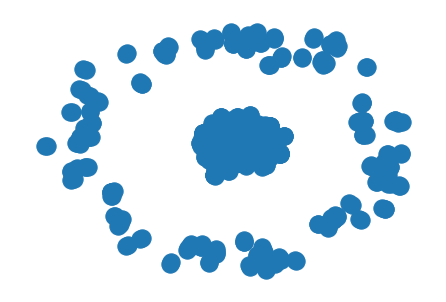

In [22]:
G = networkx.from_pandas_edgelist(connection_df, 'member_1', 'member_2', 'num_connections')
networkx.draw(G)

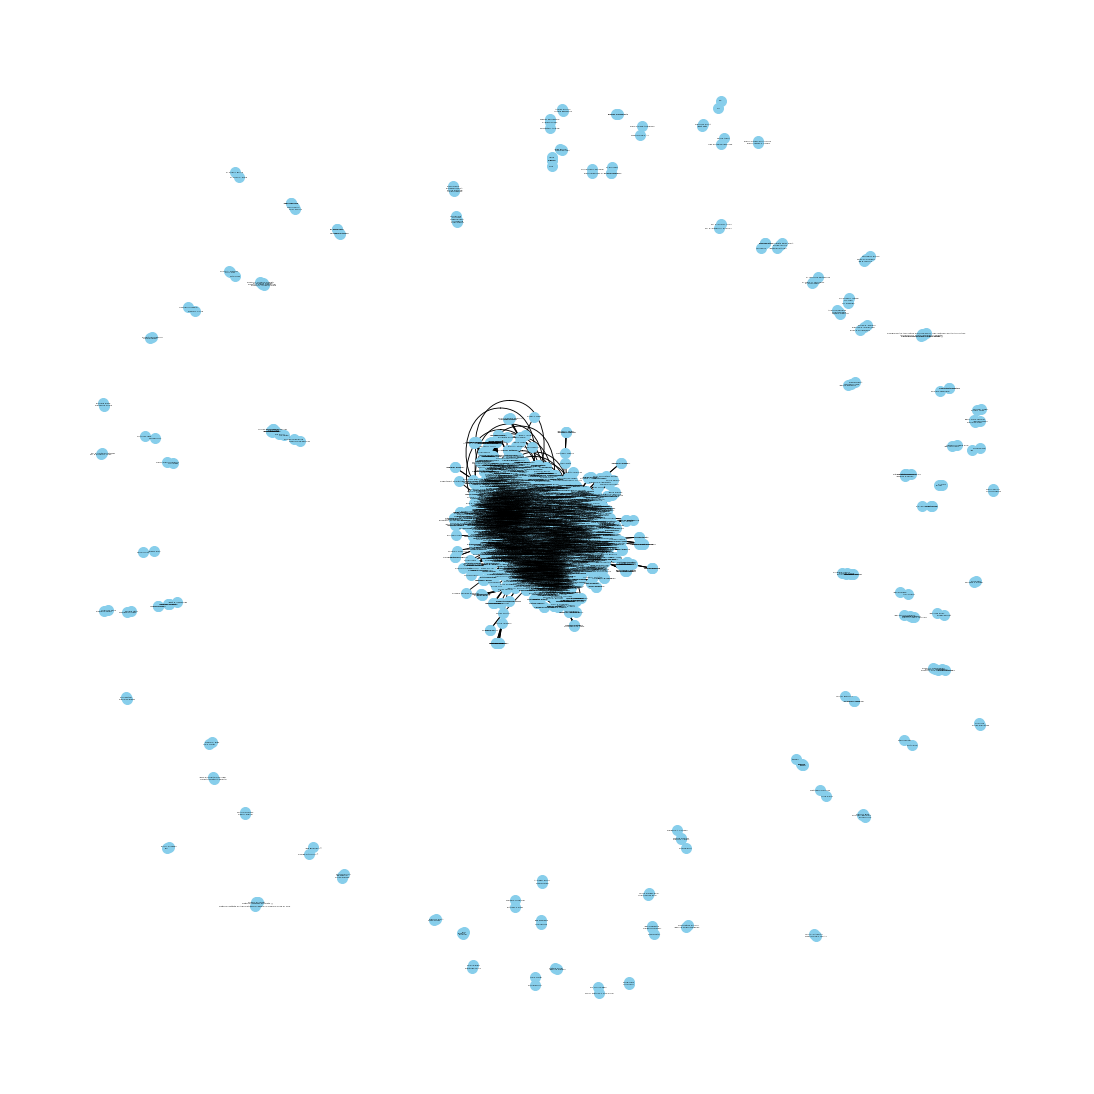

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.9, font_size=2, node_size=100)

This data graph is messy and difficult to interpret. My understanding is that the middle part is an island of connected professors while each tiny cluster (2-3 nodes) on the side is a disconnected tree.

In [24]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)


In [26]:
degree_df.head(30)

,node,degree
882,Arri Eisen,169
987,Victor Faundez,152
606,Mitchel Klein,151
42,Amita Manatunga,139
49,Lance Waller,134
696,Patricia Brennan,124
64,Paige Tolbert,122
1277,Anita Corbett,120
141,Cynthia Willett,119
490,Kerry Ressler,117


In [27]:
degree_df[degree_df['node']=='Lauren Klein']

,node,degree
4503,Lauren Klein,5


This is a network of advisors/readers. My main purpose is to generate a network of abstracts bu I haven't figured out how to do that yet

In [28]:
betweenness = networkx.betweenness_centrality(G)


In [30]:
sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

[('Arri Eisen', 0.07053680595335025),
 ('Lance Waller', 0.05154735999480913),
 ('Amita Manatunga', 0.03147369387583688),
 ('Mitchel Klein', 0.02887359295796819),
 ('Paige Tolbert', 0.02843858879343717),
 ('Roger Rochat', 0.02567524643588568),
 ('Patricia Brennan', 0.023980280381225978),
 ('Kerry Ressler', 0.02300921124461031),
 ('Juan Leon', 0.022541868756897343),
 ('Michael Goodman', 0.021042448396829134),
 ('Irene Browne', 0.0205978906181856),
 ('Michael R Kramer', 0.02039115306146143),
 ('Jessica Sales', 0.01789533094525901),
 ('Craig Hadley', 0.01778800605005549),
 ('Kathryn Yount', 0.017354030354603762),
 ('Peter J Brown', 0.01469381303532639),
 ('John E McGowan Jr.', 0.014680995944953248),
 ('Rustom Antia', 0.014397912034994017),
 ('Laurie Gaydos', 0.01381615258174371),
 ('Monique Hennink', 0.013737109894856402),
 ('Robert Stephenson', 0.01313327251851018),
 ('Eri Saikawa', 0.012950899350035993),
 ('Kevin Corrigan', 0.012915897426802558),
 ('Deborah A McFarland', 0.01270244163572

In [34]:
#I looked at betweenness centrality divided by number of connections but I don't think it turned out to be meaningful
betweenness_divided_by_connections = dict()
for name in degree_df['node'].tolist():
    betweenness_divided_by_connections[name] = float(betweenness[name]) / float(degree_df[degree_df['node']==name]['degree'])

sorted(betweenness_divided_by_connections.items(), key=lambda x: x[1], reverse=True)

[('Kristin Becknell', 0.0008090867806448855),
 ('Bassel El-Rayes', 0.0005744357101673109),
 ('Laura Podewils', 0.0005243500712067509),
 ('Arri Eisen', 0.000417377550019824),
 ('Gari D. Clifford', 0.00039369489133383404),
 ('Lance Waller', 0.0003846817910060383),
 ('Juan Leon', 0.00036357852833705394),
 ('John Blevins', 0.0003497262985861413),
 ('Roger Rochat', 0.0003469627896741308),
 ('Sharon Bergquist', 0.000344791168779137),
 ('Dabney Evans', 0.0003052247082658039),
 ('Rebecca Upton', 0.00030162740134236966),
 ('Robert Stephenson', 0.0002984834663297768),
 ('A Cecile Janssens', 0.0002954982181881887),
 ('Jessica Sales', 0.00029336608106981984),
 ('David H Howard', 0.00027101441141184256),
 ('Laurie Gaydos', 0.00026569524195660984),
 ('Chen Zhengjia', 0.0002586258122540403),
 ('Matthew J. Magee', 0.0002585933765843527),
 ('Carol J. Hogue', 0.0002585933765843527),
 ('Michael R Kramer', 0.00025811586153748643),
 ('Benjamin G Druss', 0.0002578833333144686),
 ('Eri Saikawa', 0.0002490557

In [37]:

print(degree_df[degree_df['node']=="Kristin Becknell"])
print(degree_df[degree_df['node']=="Bassel El-Rayes"])
print(degree_df[degree_df['node']=="Laura Podewils"])
print(degree_df[degree_df['node']=="Arri Eisen"])
print(degree_df[degree_df['node']=="Gari D. Clifford"])

                  node  degree
1720  Kristin Becknell       3
                node  degree
966  Bassel El-Rayes       3
                node  degree
1793  Laura Podewils       5
           node  degree
882  Arri Eisen     169
                 node  degree
710  Gari D. Clifford       7


In [36]:
from networkx.algorithms import community
# Create empty dictionary
communities = community.greedy_modularity_communities(G)

modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

communities

[frozenset({'Elizabeth Corwin',
            'Julia Gargano',
            'Amy Kirby',
            'Kevin Ault',
            'Roberd M Bostick',
            "Ciara O'Reilly",
            'Carlos Del Rio',
            'Robert H. Lyles',
            'Mark Anderson',
            'Martha Rogers',
            'Russell Kempker',
            'David Civitello',
            'Hlavsa Michele',
            'Rani Singh',
            'Patricia Chungmen Cheung',
            'Sandra Helmers',
            'Donald Bliwise',
            'Gloria D. Sclar',
            'Christine L Moe',
            'Thomas Richard Handzel',
            'Todd Everson',
            'Xu Likang',
            'Frank Ahern',
            'Joanna B Goldberg',
            'Liu',
            'Kelly Hatfield',
            'Alice Kerber',
            'Lindsay Jaacks',
            'Ilana Graetz',
            'Xiaoxian Li',
            'Anne Williams',
            'Minh Ly T. Nguyen',
            'Christa Lese Martin',
            'Rasm

In [38]:
len(communities)

130

NameError: name 'degree_df' is not defined